#### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
import tensorflow as tf

# Checking version of TensorFlow (which includes Keras)
print(f"TensorFlow Version {tf.__version__}")

TensorFlow Version 2.13.0


#### Q2. Load the Wine Quality dataset and explore its dimensions.

In [29]:
import pandas as pd

# URL of the dataset
# url = "https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification"
url = "https://raw.githubusercontent.com/PriyaPocs/NeuralNetworkAssignments/main/wine.csv"


# Load the dataset from the URL
wine_data = pd.read_csv(url)

# Explore the dimensions of the dataset
rows, columns = wine_data.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1599
Number of columns: 12


#### Q3. Check for null values, identify categorical variables, and encode them.

In [30]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null valuesin the dataset

In [31]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


quality is  categorical

In [32]:
wine_data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [33]:
wine_data['quality'].value_counts().unique()

array([855, 744])

As quality is the dependent feature with 2 catogorical values. So we can encode it good with 1 and bad with 0.

In [34]:
# Assuming 'wine_data' is your DataFrame
wine_data['quality'].replace({'bad': 0, 'good': 1}, inplace=True)

In [35]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [36]:
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### Q4. Separate the features and target variables from the dataframe.

In [37]:
# Separate the features (X) and target variable (y)
X = wine_data.drop(columns=['quality'])  # Features (all columns except 'quality')
y = wine_data['quality']  # Target variable (the 'quality' column)

# Now, X contains all the features, and y contains the target variable


#### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [38]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing


#### Q6. Perform scaling on the dataset.

In [39]:
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

In [40]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.fit(X_val)
scaled_X_test = scaler.fit(X_test)

In [41]:
scaled_X_train

array([[-0.36458197,  0.27028307, -0.88452628, ..., -1.50331912,
        -0.96231644, -0.61284241],
       [ 2.08646306, -0.82422292,  1.09972703, ..., -0.98778743,
        -0.29662295, -0.13057021],
       [ 0.86094055, -0.16751933,  1.09972703, ..., -0.02116552,
         0.70191728,  0.25524755],
       ...,
       [ 2.611687  , -1.26202532,  2.37168427, ..., -0.73002159,
         0.59096836,  0.35170199],
       [-0.4812984 ,  0.84489871, -1.03716115, ...,  0.4299247 ,
        -0.6294697 ,  0.44815643],
       [-1.06488055,  0.46182161, -1.39330918, ...,  0.94545638,
        -0.07472512, -1.19156904]])

#### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

#### Q8. Create a Sequential model and add all the layers to it.

##### Answer for Q7 and Q8 in below code


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [46]:
# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, verbose=2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Epoch 1/20
32/32 - 0s - loss: 0.7044 - accuracy: 0.6100 - val_loss: 0.6562 - val_accuracy: 0.5938 - 282ms/epoch - 9ms/step
Epoch 2/20
32/32 - 0s - loss: 0.6587 - accuracy: 0.6188 - val_loss: 0.6527 - val_accuracy: 0.6055 - 25ms/epoch - 793us/step
Epoch 3/20
32/32 - 0s - loss: 0.6575 - accuracy: 0.6178 - val_loss: 0.6301 - val_accuracy: 0.6094 - 27ms/epoch - 834us/step
Epoch 4/20
32/32 - 0s - loss: 0.6487 - accuracy: 0.6256 - val_loss: 0.5943 - val_accuracy: 0.6562 - 26ms/epoch - 819us/step
Epoch 5/20
32/32 - 0s - loss: 0.6270 - accuracy: 0.6403 - val_loss: 0.6322 - val_accuracy: 0.6172 - 26ms/epoch - 823us/step
Epoch 6/20
32/32 - 0s - loss: 0.6316 - accuracy: 0.6315 - val_loss: 0.5914 - val_accuracy: 0.6641 - 26ms/epoch - 814us/step
Epoch 7/20
32/32 - 0s - loss: 0.6360 - accuracy: 0.6364 - val_loss: 0.6257 - val_accuracy: 0.5977 - 26ms/epoch - 804us/step
Epoch 8/20
32/32 - 0s - loss: 0.6045 - accuracy: 0.6628 - val_loss: 0.5949 - val_accuracy: 0.6680 - 26ms/epoch - 824us/step
Epoch 9/2

#### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.


In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import time  # Import the 'time' module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

# Load the Wine Quality dataset and encode 'quality' as 0 or 1
# Assuming you have already loaded and preprocessed the data as shown earlier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a timestamped log directory for TensorBoard
def get_log_path(log_dir="logs/fit"):
    current_time = time.strftime("%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, current_time)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the TensorBoard callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=2,
    callbacks=[tb_cb]  # Add the TensorBoard callback here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Saving logs at logs/fit/2023_09_29_22_48_37
Epoch 1/20
40/40 - 0s - loss: 0.5967 - accuracy: 0.7091 - val_loss: 0.5215 - val_accuracy: 0.7563 - 242ms/epoch - 6ms/step
Epoch 2/20
40/40 - 0s - loss: 0.5168 - accuracy: 0.7545 - val_loss: 0.5189 - val_accuracy: 0.7375 - 30ms/epoch - 740us/step
Epoch 3/20
40/40 - 0s - loss: 0.5008 - accuracy: 0.7584 - val_loss: 0.5352 - val_accuracy: 0.7063 - 29ms/epoch - 736us/step
Epoch 4/20
40/40 - 0s - loss: 0.4862 - accuracy: 0.7670 - val_loss: 0.5223 - val_accuracy: 0.7312 - 29ms/epoch - 734us/step
Epoch 5/20
40/40 - 0s - loss: 0.4787 - accuracy: 0.7647 - val_loss: 0.5277 - val_accuracy: 0.7125 - 29ms/epoch - 728us/step
Epoch 6/20
40/40 - 0s - loss: 0.4682 - accuracy: 0.7725 - val_loss: 0.5257 - val_accuracy: 0.7063 - 30ms/epoch - 741us/step
Epoch 7/20
40/40 - 0s - loss: 0.4626 - accuracy: 0.7764 - val_loss: 0.5182 - val_accuracy: 0.7250 - 29ms/epoch - 722us/step
Epoch 8/20
40/40 - 0s - loss: 0.4516 - accuracy: 0.7811 - val_loss: 0.5177 - val_accuracy

#### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.



In [51]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# Load the Wine Quality dataset and encode 'quality' as 0 or 1
# Assuming you have already loaded and preprocessed the data as shown earlier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a timestamped log directory for TensorBoard
def get_log_path(log_dir="logs/fit"):
    current_time = time.strftime("%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, current_time)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

# Create Early Stopping callback
early_stopping_cb = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Number of epochs with no improvement to wait
    verbose=1,            # Print a message when stopping
    restore_best_weights=True  # Restore the best model weights
)

# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the TensorBoard and Early Stopping callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,            # Increase the number of epochs
    batch_size=32,
    verbose=2,
    callbacks=[tb_cb, early_stopping_cb]  # Add both callbacks here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Saving logs at logs/fit/2023_09_29_22_51_04
Epoch 1/100
40/40 - 0s - loss: 0.5969 - accuracy: 0.6693 - val_loss: 0.5506 - val_accuracy: 0.7000 - 357ms/epoch - 9ms/step
Epoch 2/100
40/40 - 0s - loss: 0.5190 - accuracy: 0.7428 - val_loss: 0.5488 - val_accuracy: 0.7063 - 31ms/epoch - 774us/step
Epoch 3/100
40/40 - 0s - loss: 0.5010 - accuracy: 0.7545 - val_loss: 0.5587 - val_accuracy: 0.6687 - 29ms/epoch - 734us/step
Epoch 4/100
40/40 - 0s - loss: 0.4880 - accuracy: 0.7662 - val_loss: 0.5374 - val_accuracy: 0.7250 - 30ms/epoch - 747us/step
Epoch 5/100
40/40 - 0s - loss: 0.4827 - accuracy: 0.7654 - val_loss: 0.5369 - val_accuracy: 0.7188 - 30ms/epoch - 757us/step
Epoch 6/100
40/40 - 0s - loss: 0.4710 - accuracy: 0.7709 - val_loss: 0.5437 - val_accuracy: 0.6938 - 30ms/epoch - 754us/step
Epoch 7/100
40/40 - 0s - loss: 0.4640 - accuracy: 0.7811 - val_loss: 0.5320 - val_accuracy: 0.7125 - 30ms/epoch - 761us/step
Epoch 8/100
40/40 - 0s - loss: 0.4575 - accuracy: 0.7811 - val_loss: 0.5231 - val_

#### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [52]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Load the Wine Quality dataset and encode 'quality' as 0 or 1
# Assuming you have already loaded and preprocessed the data as shown earlier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a timestamped log directory for TensorBoard
def get_log_path(log_dir="logs/fit"):
    current_time = time.strftime("%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, current_time)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

# Create Early Stopping callback
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Create ModelCheckpoint callback
checkpoint_cb = ModelCheckpoint(
    "best_model.h5",  # Save the best model to this file
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1
)

# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the TensorBoard, Early Stopping, and ModelCheckpoint callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=2,
    callbacks=[tb_cb, early_stopping_cb, checkpoint_cb]  # Add all three callbacks here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Saving logs at logs/fit/2023_09_29_22_53_34
Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.71875, saving model to best_model.h5
40/40 - 0s - loss: 0.6033 - accuracy: 0.6935 - val_loss: 0.5361 - val_accuracy: 0.7188 - 279ms/epoch - 7ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.71875
40/40 - 0s - loss: 0.5211 - accuracy: 0.7459 - val_loss: 0.5242 - val_accuracy: 0.7188 - 28ms/epoch - 712us/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.71875
40/40 - 0s - loss: 0.4981 - accuracy: 0.7647 - val_loss: 0.5350 - val_accuracy: 0.7063 - 29ms/epoch - 730us/step
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.71875
40/40 - 0s - loss: 0.4862 - accuracy: 0.7686 - val_loss: 0.5235 - val_accuracy: 0.7188 - 30ms/epoch - 754us/step
Epoch 5/100

Epoch 5: val_accuracy improved from 0.71875 to 0.73750, saving model to best_model.h5
40/40 - 0s - loss: 0.4744 - accuracy: 0.7733 - val_loss: 0.5216 - val_accuracy: 0.7375 - 41ms/epoch - 1ms/step
Epoch 6

/Users/platosystechnologies/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4554 - accuracy: 0.7826 - val_loss: 0.5136 - val_accuracy: 0.7250 - 32ms/epoch - 810us/step
Epoch 8/100

Epoch 8: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4506 - accuracy: 0.7873 - val_loss: 0.5232 - val_accuracy: 0.7063 - 31ms/epoch - 770us/step
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4456 - accuracy: 0.7905 - val_loss: 0.5360 - val_accuracy: 0.7188 - 29ms/epoch - 732us/step
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4360 - accuracy: 0.7912 - val_loss: 0.5041 - val_accuracy: 0.7375 - 31ms/epoch - 782us/step
Epoch 11/100

Epoch 11: val_accuracy improved from 0.73750 to 0.74375, saving model to best_model.h5
40/40 - 0s - loss: 0.4255 - accuracy: 0.8077 - val_loss: 0.5132 - val_accuracy: 0.7437 - 39ms/epoch - 973us/step
Epoch 12/100

Epoch 12: val_accuracy improved from 0.74375 to 0.75000, saving model to b

####  Q12. Print the model summary.
####  Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
####  Q14. Compile the model with the specified loss function, optimizer, and metrics.
##### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
##### Answer for Q12, Q13, Q14 and Q15 in the below code

In [53]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Load the Wine Quality dataset and encode 'quality' as 0 or 1
# Assuming you have already loaded and preprocessed the data as shown earlier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a timestamped log directory for TensorBoard
def get_log_path(log_dir="logs/fit"):
    current_time = time.strftime("%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, current_time)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

# Create Early Stopping callback
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Create ModelCheckpoint callback
checkpoint_cb = ModelCheckpoint(
    "best_model.h5",  # Save the best model to this file
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1
)

# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()  # Add this line to print the model summary

# Train the model with the TensorBoard, Early Stopping, and ModelCheckpoint callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=2,
    callbacks=[tb_cb, early_stopping_cb, checkpoint_cb]  # Add all three callbacks here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Saving logs at logs/fit/2023_09_29_22_55_36
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1536      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11905 (46.50 KB)
Trainable params: 11905 (46.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.68125, saving model to best_model.h5
40/40 - 0s

/Users/platosystechnologies/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_accuracy did not improve from 0.71875
40/40 - 0s - loss: 0.4583 - accuracy: 0.7866 - val_loss: 0.5318 - val_accuracy: 0.7188 - 31ms/epoch - 767us/step
Epoch 8/100

Epoch 8: val_accuracy improved from 0.71875 to 0.73125, saving model to best_model.h5
40/40 - 0s - loss: 0.4518 - accuracy: 0.7912 - val_loss: 0.5174 - val_accuracy: 0.7312 - 42ms/epoch - 1ms/step
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.73125
40/40 - 0s - loss: 0.4468 - accuracy: 0.7959 - val_loss: 0.5253 - val_accuracy: 0.7000 - 30ms/epoch - 749us/step
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.73125
40/40 - 0s - loss: 0.4349 - accuracy: 0.8030 - val_loss: 0.5203 - val_accuracy: 0.7125 - 30ms/epoch - 759us/step
Epoch 11/100

Epoch 11: val_accuracy did not improve from 0.73125
40/40 - 0s - loss: 0.4309 - accuracy: 0.7952 - val_loss: 0.5460 - val_accuracy: 0.7063 - 30ms/epoch - 755us/step
Epoch 12/100

Epoch 12: val_accuracy did not improve from 0.73125
40/40 - 0s - loss: 0.423

#### Q16. Get the model's parameters.

In [59]:
# Assuming you have already created and trained your model as shown in previous code

# Get the model's parameters
model_weights = model.get_weights()

# Iterate through the model's layers and print the number of parameters in each layer
for i, layer_weights in enumerate(model_weights):
    if i < len(model.layers):
        layer_name = model.layers[i].name
        num_params = len(layer_weights)
        print(f"Layer '{layer_name}' has {num_params} parameters")

# If you want to access the parameters of a specific layer, you can do so like this:
# For example, to get the weights and biases of the first layer (assuming it's a Dense layer):
if len(model.layers) > 0:
    first_layer_weights = model.get_layer(index=0).get_weights()
    if len(first_layer_weights) == 2:
        weights = first_layer_weights[0]  # Weights
        biases = first_layer_weights[1]  # Biases
        print(weights.shape)
        print(biases.shape)


Layer 'dense_24' has 11 parameters
Layer 'dense_25' has 128 parameters
Layer 'dense_26' has 128 parameters
Layer 'dense_27' has 64 parameters
(11, 128)
(128,)


#### Q17. Store the model's training history as a Pandas DataFrame.

In [62]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.611837,0.671618,0.558469,0.68125
1,0.523874,0.735731,0.546786,0.68125
2,0.501760,0.755278,0.537488,0.68125
3,0.489425,0.767787,0.545426,0.70625
4,0.475150,0.780297,0.530695,0.71875
5,0.471414,0.782643,0.530252,0.70625
6,0.458276,0.786552,0.531841,0.71875
7,0.451769,0.791243,0.517430,0.73125
8,0.446818,0.795934,0.525267,0.70000
9,0.434905,0.802971,0.520281,0.71250


#### Q18. Plot the model's training history.

Saving logs at logs/fit/2023_09_29_23_06_57
Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to best_model.h5
40/40 - 0s - loss: 0.6003 - accuracy: 0.6974 - val_loss: 0.5481 - val_accuracy: 0.6875 - 255ms/epoch - 6ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.68750
40/40 - 0s - loss: 0.5227 - accuracy: 0.7475 - val_loss: 0.5478 - val_accuracy: 0.6875 - 32ms/epoch - 805us/step
Epoch 3/100

Epoch 3: val_accuracy improved from 0.68750 to 0.73125, saving model to best_model.h5
40/40 - 0s - loss: 0.5031 - accuracy: 0.7553 - val_loss: 0.5429 - val_accuracy: 0.7312 - 41ms/epoch - 1ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.73125 to 0.73750, saving model to best_model.h5
40/40 - 0s - loss: 0.4907 - accuracy: 0.7592 - val_loss: 0.5338 - val_accuracy: 0.7375 - 41ms/epoch - 1ms/step
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4835 - accuracy: 0.7701 - val_loss: 0.5596 - val_accuracy: 0.6687 

/Users/platosystechnologies/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4762 - accuracy: 0.7725 - val_loss: 0.5177 - val_accuracy: 0.7375 - 32ms/epoch - 799us/step
Epoch 8/100

Epoch 8: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4591 - accuracy: 0.7826 - val_loss: 0.5268 - val_accuracy: 0.7188 - 31ms/epoch - 783us/step
Epoch 9/100

Epoch 9: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4518 - accuracy: 0.7905 - val_loss: 0.5148 - val_accuracy: 0.7250 - 30ms/epoch - 740us/step
Epoch 10/100

Epoch 10: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4470 - accuracy: 0.7897 - val_loss: 0.5129 - val_accuracy: 0.7312 - 31ms/epoch - 782us/step
Epoch 11/100

Epoch 11: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4357 - accuracy: 0.7983 - val_loss: 0.5140 - val_accuracy: 0.7375 - 32ms/epoch - 805us/step
Epoch 12/100

Epoch 12: val_accuracy did not improve from 0.73750
40/40 - 0s - loss: 0.4314 - accuracy: 0.7991 - val_loss: 

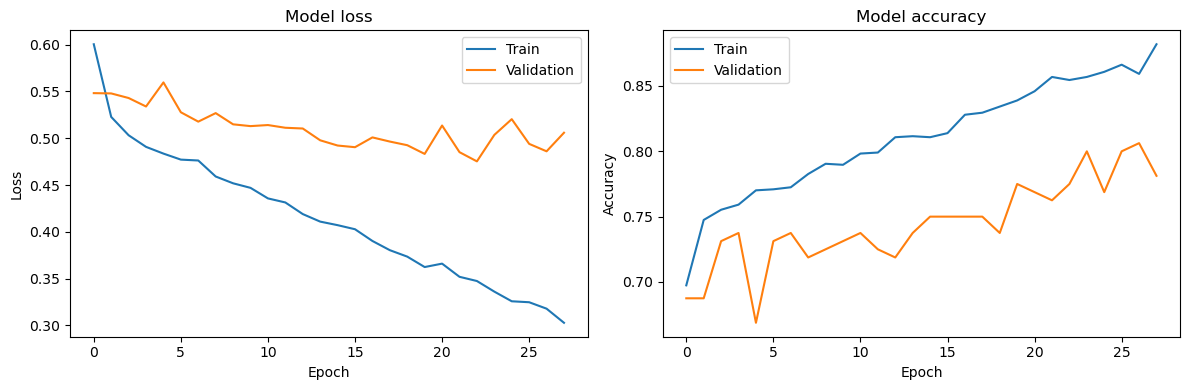

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import time
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

# Load the Wine Quality dataset and encode 'quality' as 0 or 1
# Assuming you have already loaded and preprocessed the data as shown earlier

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create a timestamped log directory for TensorBoard
def get_log_path(log_dir="logs/fit"):
    current_time = time.strftime("%Y_%m_%d_%H_%M_%S")
    logs_path = os.path.join(log_dir, current_time)
    print(f"Saving logs at {logs_path}")
    return logs_path

log_dir = get_log_path()
tb_cb = TensorBoard(log_dir=log_dir)

# Create Early Stopping callback
early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# Create ModelCheckpoint callback
checkpoint_cb = ModelCheckpoint(
    "best_model.h5",  # Save the best model to this file
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # 'max' for accuracy, 'min' for loss, etc.
    verbose=1
)

# Create the ANN model
model = Sequential()

# Add the input layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers (at least 2)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer (1 neuron with sigmoid activation for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with the TensorBoard, Early Stopping, and ModelCheckpoint callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=2,
    callbacks=[tb_cb, early_stopping_cb, checkpoint_cb]  # Add all three callbacks here
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Convert the model's training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Plot the training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Train')
plt.plot(history_df['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Train')
plt.plot(history_df['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


#### Q19. Evaluate the model's performance using the test data.

In [64]:
# Assuming you have already created and trained your model as shown in previous code

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Print the test loss (optional)
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 81.25%
Test Loss: 0.4685
